### *“The capacity to learn is a gift;  the ability to learn is a skill; the willingness to learn is a choice.”*
*-Brian Herbert, contemporary American author*

----

### YOUR NAME HERE: Daniel DeLuca


----

# Lab M: Group By - More Advanced

### Use the cheat sheet posted in Blackboard to help guide you if you forget syntax!!!

---

Begin by importing the new plotting package below.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')   
#plt.style.use('fivethirtyeight') #A helpful style package

# **- - - - - - - - - - - - - - - - - - - - - - - - - - -**

### Selecting a few columns ###

The table `top` consists of U.S.A.'s top grossing movies of all time. The first column contains the title of the movie; *Star Wars: The Force Awakens* has the top rank, with a box office gross amount of more than 900 million dollars in the United States. The second column contains the name of the studio that produced the movie. The third contains the domestic box office gross in dollars, and the fourth contains the  gross amount that would have been earned from ticket sales at 2016 prices. The fifth contains the release year of the movie. 

There are 200 movies on the list. Here are the top ten according to unadjusted gross receipts.

In [4]:
top = pd.read_csv('top_movies.csv')
top

,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
...,...,...,...,...,...
195,The Caine Mutiny,Columbia,21750000,386173500,1954
196,The Bells of St. Mary's,RKO,21333333,545882400,1945
197,Duel in the Sun,Selz.,20408163,443877500,1946
198,Sergeant York,Warner Bros.,16361885,418671800,1941


Sometimes we just want to take a selection of the columns,  

To do that, just use the hard bracket notation with the list of columns you want (so you'll use double hardbrackets as such below).

 * ``top[['Title', 'Studio']]`` selects all rows from top dataframe but just the ```Title``` and ```Studio``` columns

In [83]:
#Run and see what is returned
top[['Title', 'Studio']]

,Title,Studio
0,Star Wars: The Force Awakens,Buena Vista (Disney)
1,Avatar,Fox
2,Titanic,Paramount
3,Jurassic World,Universal
4,Marvel's The Avengers,Buena Vista (Disney)
...,...,...
195,The Caine Mutiny,Columbia
196,The Bells of St. Mary's,RKO
197,Duel in the Sun,Selz.
198,Sergeant York,Warner Bros.


So to select just the title and gross we'll use just those titles.

In [6]:
top[['Title', 'Gross']] #selects all rows from the top dataframe but just the "Title" and "Gross" columns

,Title,Gross
0,Star Wars: The Force Awakens,906723418
1,Avatar,760507625
2,Titanic,658672302
3,Jurassic World,652270625
4,Marvel's The Avengers,623357910
...,...,...
195,The Caine Mutiny,21750000
196,The Bells of St. Mary's,21333333
197,Duel in the Sun,20408163
198,Sergeant York,16361885


# ------------------ #
# Question 1

Below, write code to select all rows but just these 3 columns from ``top``: 

* Title, Gross (Adjusted), and Year

In [8]:
top[['Title','Gross (Adjusted)','Year']]

,Title,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,906723400,2015
1,Avatar,846120800,2009
2,Titanic,1178627900,1997
3,Jurassic World,687728000,2015
4,Marvel's The Avengers,668866600,2012
...,...,...,...
195,The Caine Mutiny,386173500,1954
196,The Bells of St. Mary's,545882400,1945
197,Duel in the Sun,443877500,1946
198,Sergeant York,418671800,1941


---

### Grouping Categorical Data ###

In the last lab, you used ``groupby`` for the first time.  This function is meant to help us "group" together categorical data.

Let's get some more practice with it now.

The Disney subsidiary Buena Vista shows up frequently in the top ten, as do Fox and Warner Brothers. What if we want to know which studios will appear most frequently if we look among all 200 rows?

To figure this out, first notice that all we need is a table with the movies and the studios; the other information is unnecessary.



In [9]:
movies_and_studios = top[['Title', 'Studio']]
movies_and_studios

,Title,Studio
0,Star Wars: The Force Awakens,Buena Vista (Disney)
1,Avatar,Fox
2,Titanic,Paramount
3,Jurassic World,Universal
4,Marvel's The Avengers,Buena Vista (Disney)
...,...,...
195,The Caine Mutiny,Columbia
196,The Bells of St. Mary's,RKO
197,Duel in the Sun,Selz.
198,Sergeant York,Warner Bros.


The DataFarme method `groupby` allows us to count how frequently each studio appears in the table, by calling each studio a category and assigning each row to one category. 

The `groupby` method takes as its argument the label of the column that contains the categories. 

After grouping, in this example, we call ``count`` to tell Python that you just want a count fo how many rows fall in each category.

Using the split-apply-combine explanation, the following code:

* first splits the rows of ``movies_and_studios`` by "Studio" type, 
* then applies the "count" function, 
* and finally combines the results into a new table.

NOTE: We call "count" the "aggregate" function here.

In [10]:
#Group by the rows by "Studio" and count them

movies_and_studios.groupby('Studio').count()

,Title
Studio,
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7


**NOTE:** The resulting dataframe is not indexed by integers (0, 1, 2, etc) but rather by the catgorgies of the column we grouped by.  If you ever just want a regular-indexed data frame, then pass in `as_index=False` so that the row indices stay as numbers.  

In [11]:
#Run this cell and notice that there is now a column for the Studio cateogry and the indices are what we're used to.

movies_and_studios.groupby('Studio', as_index=False).count()

,Studio,Title
0,AVCO,1
1,Buena Vista (Disney),29
2,Columbia,10
3,Disney,11
4,Dreamworks,3
5,Fox,26
6,IFC,1
7,Lionsgate,3
8,MGM,7
9,MPC,1


---

The first 2 entries in this table tell us:

* The AVCO studio occurs once in the table.  So this studio only has 1 title that had a top gross.
* The Buena Vista (Disney) occurs 29 times in the table.  So this studio has 29 titles that had a top gross.

---

## How to see what rows have been grouped together  - For Loops with Stars

Okay, let's talk about the first part of the code a little more.

In other words, let's talk about what ``movies_and_studios.groupby('Studio')`` actually does, so the code portion before we specificy the aggregate function ```count```.

In [12]:
#Run this cell
movies_and_studios_groups = movies_and_studios.groupby('Studio')
movies_and_studios_groups

The above code does a lot underneath the covers to group the rows according to ``"Studio"``, but the output doesn't actually show you the groups. Instead, you should have just seen the following generic message printed out.

* ```<pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002614BFEF908>``` 

To actually see the groups, you could use the code in the next code cell, which loops over the 'key' (so the category) of each group one-by-one and prints it.

So go ahead and run the next code cell.  You will get a list of output showing you how the data was grouped together.


* For example, the first group will be for the AVCO Studio and it only had one movie titled the "Graduate", so when we "count" this group, we get 1.
* The second group is the "Buena Vista (Disney)" Studio and you see that rows 0, 4, 8, 13, ... 126 from the original table were from this studio.  When we "count" this group, we get a count of 29 rows.

In [1]:
#Do the grouping, leaving off the aggregate function.
movies_and_studios_groups = movies_and_studios.groupby('Studio')

#Here we loop over each of the values found in the "Studio column" so that we can analyze the groups better.
#Let's call this the "For Loop with Stars"
for key, group in movies_and_studios_groups:
    print(key)
    print(group)
    print('******************************')  #Stars signal the end of one group

NameError: name 'movies_and_studios' is not defined

---

# If it is annoying to scroll past the long list of output, then Feel free to right click and choose "Clear Output" so that you don't have to scroll far.


---

Okay, so let's recap.  The following code just splits the dataframe into groups according to the values in the ``Studio`` column.

* ``movies_and_studios.groupby('Studio')``

We can LOOP OVER these groups to inspect what rows were grouped together.

Then we apply an aggregate function (``.count``) to explain to Python how to "smush" the group into a single cell with a single value.  Here we applied ``count`` because we wanted to just count the number of rows in each group.

In [14]:
studios_distribution = movies_and_studios.groupby('Studio').count()
studios_distribution 

,Title
Studio,
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7


Now, the Title Column after groupin contains the count of the titles for each studio, so we can rename the 'Title' column to 'Counts' now.

In [15]:
studios_distribution = movies_and_studios.groupby('Studio').count()
studios_distribution = studios_distribution.rename(columns={'Title':'Count'})
studios_distribution

,Count
Studio,
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7


Thus, the `groupby` function creates a distribution table that shows how the movies are distributed among the categories (studios). 

We can now use this table, along with the graphing skills that we acquired above, to draw a bar chart that shows which studios are most frequent among the 200 highest grossing movies.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

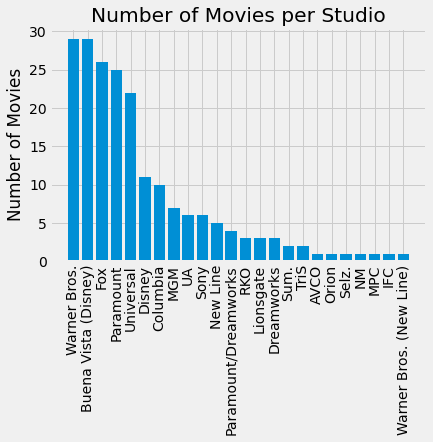

In [17]:
studios_distribution = studios_distribution.sort_values('Count', ascending =False)
               
plt.bar(studios_distribution.index,studios_distribution['Count'])
plt.title("Number of Movies per Studio")
plt.ylabel("Number of Movies")
plt.xticks(rotation = 90)

# **- - - - - - - - - - - - - - - - - - - - - - - - - - -**
# **Question 2**

Notice that the labels are all squished together in the above picture.  

Go back and add a line of code to rotate the x axis titles by 90 degrees to fix this above. Don't remember how?  Look it up in the cheat sheet.

# **- - - - - - - - - - - - - - - - - - - - - - - - - - -**



# **Question 3**

Create the same bar chart above, but do so horizontally. The text on the y axis will be kind of squished, so fix that as follows

* Change the size with ``plt.figure(figsize=(15,20))``
* Change the font size so that it's not so small: ``plt.rcParams['font.size'] = '16'``

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

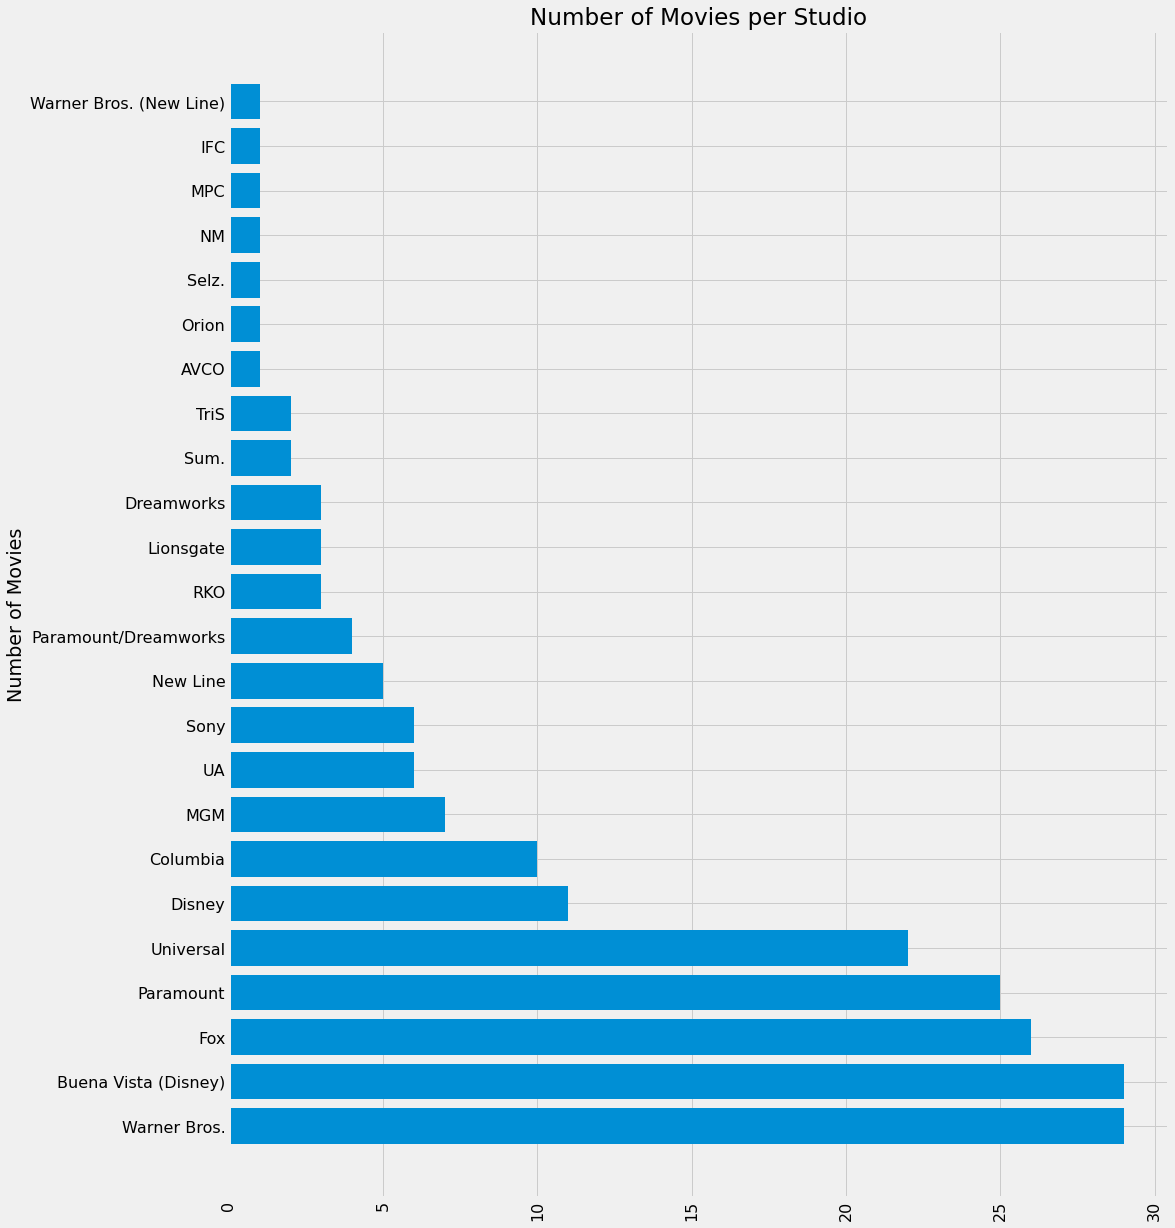

In [21]:
plt.figure(figsize = (15,20))
plt.rcParams['font.size'] ='16'
plt.barh(studios_distribution.index,studios_distribution['Count'])
plt.title("Number of Movies per Studio")
plt.ylabel("Number of Movies")
plt.xticks(rotation = 90)

---

From the previous bar charts, we see that Warner Brothers and Buena Vista are the most common studios among the top 200 movies. Warner Brothers produces the Harry Potter movies and Buena Vista produces Star Wars. 

Because total gross receipts are being measured in unadjusted dollars, it is not very surprising that the top movies are more frequently from recent years than from bygone decades. In absolute terms, movie tickets cost more now than they used to, and thus gross receipts are higher. Let's verify this by creating a scatter plot that show the distribution of the 200 movies by year of release.

# **- - - - - - - - - - - - - - - - - - - - - - - - - - -**
# **Question 4**

A) Start by creating a table  from the original ``top`` dataframe that contains the number of movies for each year. 

In [52]:
movies_and_years = top[['Title',"Year"]]
movies_and_years = movies_and_years.groupby('Year').count()
movies_and_years

,Title
Year,
1921,1
1937,1
1939,1
1940,1
1941,2
...,...
2011,2
2012,5
2013,4


B) Next, loop over your groups and make sure they look correct. So copy the "For Loop with Stars" Code above to start.

Check: Do all the groups grouped by year and giving the numbers shown in the movie_and_years table?

In [ ]:
#Use the for loop with stars here to loop over each category and show the rows for that category.  

movies_and_year_groups = movies_and_years.groupby('Year')


for key, group in movies_and_year_groups:
    print(key)
    print(group)
    print('******************************') 

C) Now use movies_and_years to show a scatter plot of the count of movies for each year.  You'll notice an upward trend of the data as the years get closer to today.

Text(0.5, 1.0, 'Number of Top Movies each Year')

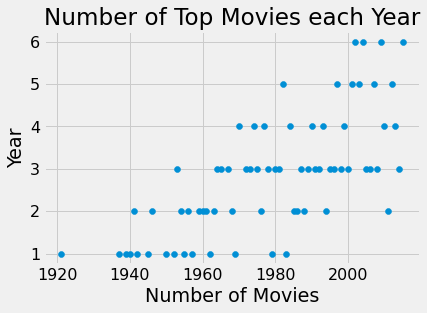

In [67]:
#plot the dot/scatter plot here!

plt.scatter(movies_and_years.index , movies_and_years['Title'])
plt.xlabel('Number of Movies')
plt.ylabel('Year')
plt.title('Number of Top Movies each Year')

Finally, use what you've learned to create a bar chart for the same data. You might have to play around with rcParams and figSize to make the plot applealing.  

Notice that all of the longest bars correspond to years after 2000. This is consistent with our observation that recent years should be among the most frequent.

Text(0.5, 1.0, 'Number of Top Movies each Year')

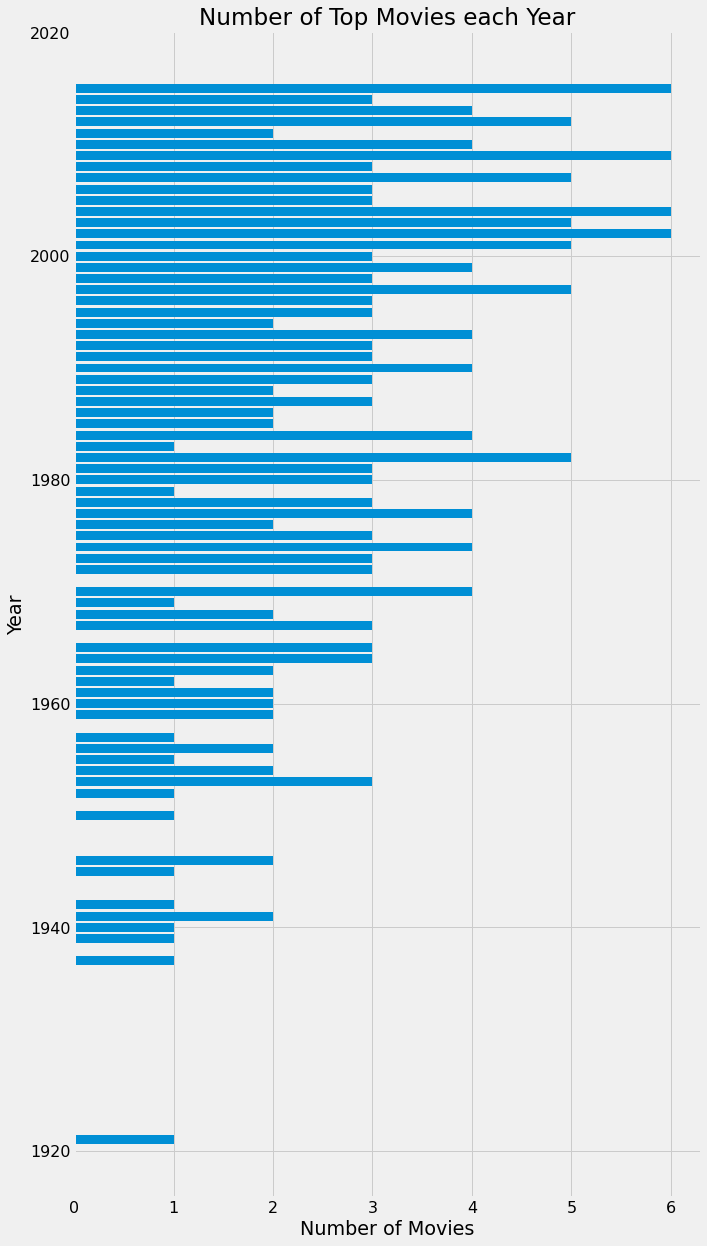

In [66]:
#plot the bar chart here!
plt.figure(figsize = (10,20))
plt.rcParams['font.size'] ='16'
plt.barh(movies_and_years.index , movies_and_years['Title'])
plt.xlabel('Number of Movies')
plt.ylabel('Year')
plt.title('Number of Top Movies each Year')


---

As of the moment, you have used only "count" to aggregate rows.  But you could also use these other functions too:
    
* dataframe.groupby("column").sum() - This sums the values across the rows in each group
* dataframe.groupby("column").mean() - This sums the values across the rows in each group
* dataframe.groupby("column").min() - This finds the minimum value of all the rows in each group
* dataframe.groupby("column").max() - This finds the minimum values of all the rows in each group

# **- - - - - - - - - - - - - - - - - - - - - - - - - - -**
# **Question 5**

Read in the Minard data set and create a table using ``groupby`` that shows the average number of survivors for each direction (Advance/Retreat).

* Note:  Feel free to use the for loop with stars to inspect your groups, but if you  don't need to then that is okay too.

In [74]:
#Read in the "data_minard.csv" file here
minard = pd.read_csv('data_minard.csv')
minard


,Longitude,Latitude,City,Direction,Survivors
0,32.0,54.8,Smolensk,Advance,145000
1,33.2,54.9,Dorogobouge,Advance,140000
2,34.4,55.5,Chjat,Advance,127100
3,37.6,55.8,Moscou,Advance,100000
4,34.3,55.2,Wixma,Retreat,55000
5,32.0,54.6,Smolensk,Retreat,24000
6,30.4,54.4,Orscha,Retreat,20000
7,26.8,54.3,Moiodexno,Retreat,12000


In [73]:
#Find the desired data frame here
mean_survivors_per_direction = minard.groupby('Direction').mean()
mean_survivors_per_direction

,Longitude,Latitude,Survivors
Direction,,,
Advance,34.300,55.250,128025.0
Retreat,30.875,54.625,27750.0


# **- - - - - - - - - - - - - - - - - - - - - - - - - - -**

# **Question 6**

Create the following bar chart showing the total population (in millions) of each continent in 2002.

Follow the provided steps to help you.

![continents_population_in_2002](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS250/main/pictures/pop_per_continent_2002.png)

In [92]:
#Read in the "countries.csv" file here
countries = pd.read_csv('countries.csv')
countries

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [106]:
#Find just the 2002 rows and the population/continent columns (they are the only rows/columns we need)
countries_2002 = countries[countries['year'] == 2002]
countries_2002[['population','continent']]

,population,continent
10,25268405,Asia
22,3508512,Europe
34,31287142,Africa
46,10866106,Africa
58,38331121,Americas
...,...,...
1654,80908147,Asia
1666,3389578,Asia
1678,18701257,Asia
1690,10595811,Africa


In [112]:
#Find the population per each continent using groupby
countries_2002_group = countries_2002.groupby(countries_2002['continent']).sum()
countries_2002_group

,year,lifeExpectancy,population,gdpPerCapita
continent,,,,
Africa,104104,2772.912,833723916,135168.028262
Americas,50050,1810.551,849772762,232191.927683
Asia,66066,2284.718,3601802203,335744.983087
Europe,60060,2301.018,578223869,651351.972673
Oceania,4004,159.480,23454829,53877.556080


Text(0.5, 1.0, 'Continent populations')

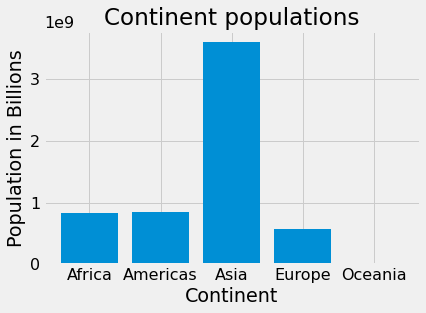

In [130]:
#Create the bar chart
#You may have to set the font back to something smaller like 12
plt.bar(countries_2002_group.index , countries_2002_group['population'])
plt.xlabel('Continent')
plt.ylabel('Population in Billions')
plt.title('Continent populations')


# **- - - - - - - - - - - - - - - - - - - - - - - - - - -**

# **Question 7**

Have any countries been added to the data set from 1952 till now?

Make your decision by using a ``groupby`` to show how many countries exist in the spreadsheet per each year.

In [150]:
#Find the number of countries per year.
count = countries.groupby(['country']).count() 
count 12


SyntaxError: invalid syntax (Temp/ipykernel_71716/754965209.py, line 3)

There were not countries added, this is shown by groupby program showing no increase in countries.